**$\S$ 데이터에 대한 가중치 행렬 $W_x$, hidden state에 대한 가중치 행렬 $W_h$, 편향 벡터 $b$가 각각
$$
W_x = \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}, \qquad
W_h = \begin{pmatrix} -5\log 2 & -5\log3 \\ 5\log 2 & 5\log 3 \end{pmatrix}, \qquad
b=[0,0]
$$
인 RNN을 생각하자.**

**1. 다음 그래프에 가중치를 표시하시오.**
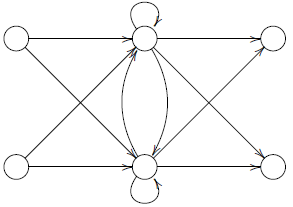

$W_x$는 입력층에서 은닉층으로 가는 화살표위의 가중치를 담고있고 $W_h$는 은닉층에서 은닉층으로 순환하는 화살표위의 가중치를 담고 있습니다.  
가중치 행렬의 $i$행 $j$열의 원소는 $i$번째 뉴런에서 $j$번째 뉴런으로 가는 화살표의 가중치입니다.
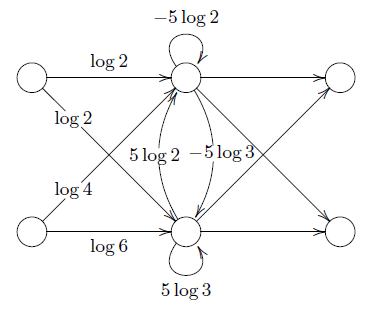

**2. 최초 시각 $t=0$과 그 다음 시각 $t=1$에서 입력된 데이터 $x_0$와 $x_1$이
$$
x_0 = [-1,1], \qquad x_1=[2,-1]
$$
이라 하자. 시각 $t=0$과 $t=1$일 때 만들어지는 hidden state $h_0$와 $h_1$을 구하시오.**

$t=0$은 시작 시점이기 때문에 과거에서 흘러들어온 hidden state가 없겠죠.  
따라서, 입력 데이터 $x_0$에 대해서만 Affine변환
$$
x_0 W_x +b = \begin{pmatrix} -1 & 1\end{pmatrix} \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}
= \begin{pmatrix} \log2 & \log3 \end{pmatrix}
$$
을 합니다.  
쌍곡 탄젠트 함수
$$
{\rm tahn}x = {e^{2x}-1 \over e^{2x}+1}
$$
를 취하면 hidden state
$$
h_0 = ({e^{2\log2}-1 \over e^{2\log2}+1}, {e^{2\log3}-1 \over e^{2\log3}+1}) = ({4-1 \over 4+1}, {9-1 \over 9+1})
= ({3 \over 5}, {4 \over 5})
$$
를 얻습니다.

hidden state $h_0$는 다음층으로 전달됨과 동시에 은닉층을 순환하여 다음 시각 $t=1$에 전달이 됩니다.  
$t=1$일 때는 입력 데이터 $x_1$뿐 아니라 과거에서 전달된 hidden state $h_0$에도 Affine 변환
$$
\begin{aligned}
x_1 W_x + h_0 W_h + b &= \begin{pmatrix} 2 & -1\end{pmatrix} \begin{pmatrix} \log 2 & \log2 \\ \log 4 & \log 6 \end{pmatrix}
+ \begin{pmatrix} {3 \over 5} & {4 \over 5} \end{pmatrix} \begin{pmatrix} -5\log 2 & -5\log3 \\ 5\log 2 & 5\log 3 \end{pmatrix} \\
&= \begin{pmatrix} 0 & 2\log2-\log6 \end{pmatrix} + \begin{pmatrix} \log2 & \log3 \end{pmatrix} \\
&= \begin{pmatrix} \log2 & \log2 \end{pmatrix}
\end{aligned}
$$
을 합니다.  
쌍곡 탄젠트 함수를 취하면 hidden state
$$
h_1 = ({e^{2\log2}-1 \over e^{2\log2}+1}, {e^{2\log2}-1 \over e^{2\log2}+1}) = ({4-1 \over 4+1}, {4-1 \over 4+1})
= ({3 \over 5}, {3 \over 5})
$$
을 얻습니다.

**3. 다음은 RNN층의 계산 그래프이다.
시각 $t=1$에서 흘러들어온 hidden state에 관한 두 미분의 합이
$$
{\partial L \over \partial h_1} = [{125 \over 16}, 0]
$$
일 때, 계산 그래프를 이용하여 미분
$$
{\partial L \over \partial W_h}, \qquad {\partial L \over \partial h_0}, \qquad {\partial L \over \partial W_x}, \qquad {\partial L \over \partial x_1} \qquad {\partial L \over \partial b}
$$
의 값을 구하시오.**
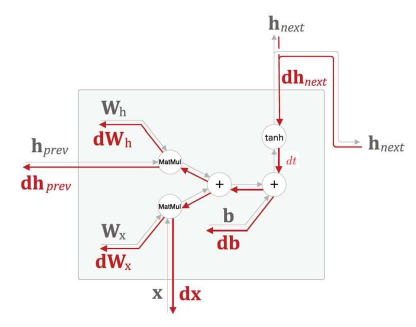

hidden state $h_1$은 다음 층으로 전달됨과 동시에 다음 시각의 은닉층으로 순환됩니다.  
$h_1$을 카피하는 repeat 노드가 숨어있다고 봐야 합니다.  
repeat 노드의 역전파는 sum입니다.  
그래서 다음 층에서 흘러들어온 미분과 다음 시각의 은닉층에서 흘러들어온 미분을 더해야 하고 그 합이 주어진
$$
{\partial L \over \partial h_1} = ({125 \over 16}, 0)
$$
입니다.  
위에서 구한 쌍곡 탄젠트 노드의 순전파 값 $h_1 = ({3 \over 5}, {3 \over 5})$에 $y={\rm tahn} x$의 미분공식
$$
y'= 1-y^2
$$
을 적용한 후에 흘러들어온 미분에 곱하면 탄젠트 노드의 역전파 값
$$
dt = ({125 \over 16}, 0) \odot (1-({3 \over 5})^2, 1-({3 \over 5})^2)
= ({125 \over 16}, 0) \odot ({16 \over 25}, {16 \over 25}) = (5,0)
$$
을 얻습니다.

Affine층에서는 미분 $dt=(5,0)$를 받아 역전파를 진행합니다.  
Affine층의 역전파 공식을 적용하면 미분
$$
\begin{aligned}
{\partial L \over \partial b} &= dt = [5,0] \\
{\partial L \over \partial W_h} &= h_0^T ~dt = \begin{pmatrix}{3 \over 5} \\ {4 \over 5}\end{pmatrix} \begin{pmatrix}5 & 0\end{pmatrix} 
= \begin{pmatrix}3&0\\4&0\end{pmatrix}\\
{\partial L \over \partial h_0} &= dt ~W_h^T = \begin{pmatrix} 5&0 \end{pmatrix} \begin{pmatrix} -5\log 2 & 5\log 2 \\ -5\log3 & 5\log 3 \end{pmatrix} = [-25\log2, -25\log2] \\
{\partial L \over \partial W_x} &= x_1^T ~dt = \begin{pmatrix}2\\-1\end{pmatrix} \begin{pmatrix}5 & 0\end{pmatrix} 
= \begin{pmatrix}10&0\\-5&0\end{pmatrix} \\
{\partial L \over \partial x_1} &= dt ~W_x^T = \begin{pmatrix} 5&0 \end{pmatrix} \begin{pmatrix} \log 2 & \log 4 \\ \log2 & \log 6 \end{pmatrix}
= [5\log2, 10\log2]
\end{aligned}
$$
을 얻습니다.

**4. RNN 클래스를 이용하여 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.time_layers import RNN

Wx = np.log(np.array([[2,2],[4,6]]))
Wh = np.array([[-5*np.log(2),-5*np.log(3)],[5*np.log(2),5*np.log(3)]])
b = np.zeros(2)

rnn = RNN(Wx, Wh, b)

x0 = np.array([[-1,1]])
h_prev = np.zeros(2)
h0 = rnn.forward(x0,h_prev)
print('h0 : '+str(h0))

x1=np.array([[2,-1]])
h1=rnn.forward(x1,h0)
print('h1 : '+str(h1))

h0 : [[0.6 0.8]]
h1 : [[0.6 0.6]]


In [2]:
dh_next=np.array([[125/16,0]])
dx, dh = rnn.backward(dh_next)
print('dWh :\n'+str(rnn.grads[1]))
print('dh : '+str(dh))
print('dWx :\n'+str(rnn.grads[0]))
print('dx : '+str(dx))
print('db :'+str(rnn.grads[2]))

dWh :
[[3. 0.]
 [4. 0.]]
dh : [[-17.32867951  17.32867951]]
dWx :
[[10.  0.]
 [-5. -0.]]
dx : [[3.4657359  6.93147181]]
db :[5. 0.]


위에서 손계산 한 결과와 맞아 떨어지네요.

In [3]:
print(-25*np.log(2), 5*np.log(2), 10*np.log(2))

-17.328679513998633 3.4657359027997265 6.931471805599453
